In [109]:
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List
import os 
import numpy as np 

In [110]:
def compute_rouge_l(candidate, reference):
    candidate = str(candidate)
    reference = str(reference)
    m, n = len(candidate), len(reference)
    print(candidate)
    print(reference)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if candidate[i - 1] == reference[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])
    
    return dp_table[m][n] / n

In [111]:
csv_files = [f"syntheses_df{count * 10}.csv" for count in range(1,6)]


In [112]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [113]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return filtered_tokens


In [115]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    return tokens

In [116]:
def compute_similarity_score(answer,syntheses):


    if not isinstance(syntheses, str):
        # Convert syntheses to string if it's not already
        syntheses = str(syntheses)




    tokens_answer = preprocess_text(answer)
    tokens_syntheses = preprocess_text(syntheses)
    str_answer = ' '.join(tokens_answer)
    str_syntheses = ' '.join(tokens_syntheses)
    freqdist_answer = nltk.FreqDist(str_answer.split())
    freqdist_syntheses = nltk.FreqDist(str_syntheses.split())
    # Extract frequencies for unique tokens in both texts
    unique_tokens = set(freqdist_answer.keys()).union(freqdist_syntheses.keys())

    freq_answer = [freqdist_answer[token] for token in unique_tokens]
    freq_syntheses = [freqdist_syntheses[token] for token in unique_tokens]

    vector_answer = np.array(freq_answer).reshape(1, -1)
    vector_syntheses = np.array(freq_syntheses).reshape(1, -1)

    similarity_score = cosine_similarity(vector_answer, vector_syntheses)[0][0]

    return similarity_score

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [118]:
df

,context,answer,syntheses
0,Services Vendor Inc. \n100 Elm Street Pleasant...,"$22,500.00","$22,500.00"
1,Services Vendor Inc. \n100 Elm Street Pleasant...,#0001,#0001
2,Services Vendor Inc. \n100 Elm Street Pleasant...,•Front End Engineering Service;\n•Back End Eng...,•Front End Engineering Service;\n•Back End Eng...
3,Services Vendor Inc. \n100 Elm Street Pleasant...,Bia Hermes,Bia Hermes
4,Services Vendor Inc. \n100 Elm Street Pleasant...,#1000,#1000
...,...,...,...
195,"Nokia said it would cut up to 14,000 jobs as p...","Nokia is cutting 14,000 jobs as part of a cost...",Nokia announced job cuts after steep decline i...
196,2.1. Duties and Responsibilities and Extent of...,"•Senior Vice President, Event Planning ('SVP')...",•Running Employer’s day-to-day operations
197,NVIDIA Announces Financial Results for Second ...,NVIDIA Announces Second Quarter Fiscal 2024 Re...,NVIDIA Announces Financial Results for Second ...
198,'The world's most advanced AI models are comin...,Microsoft Cloud is the platform of choice for ...,New era of computing using AI and natural lang...


In [119]:

total_average_rouge_l_scores = []
total_average_cosine_similarity_scores  = []

num_labels = []
count = 0 
for csv_file in csv_files:

    count += 10
    num_labels.append(count)

    df = pd.read_csv(csv_file)
    rouge_l_scores = [] 
    cosine_similarity_scores = [] 

    for idx, row in df.iterrows():
        answer = row['answer']
        syntheses = row['syntheses'] 

        print(answer,syntheses)

    
        compute_sim_score = compute_similarity_score(answer,syntheses)
        cosine_similarity_scores.append(compute_sim_score)



        
        rouge_l_score = compute_rouge_l(answer, syntheses)
        rouge_l_scores.append(rouge_l_score)
       

    total_average_cosine_similarity_score = sum(cosine_similarity_scores) / len(cosine_similarity_scores)
    total_average_cosine_similarity_scores.append(total_average_cosine_similarity_score)


    total_average_rouge_l_score = sum(rouge_l_scores)/len(rouge_l_scores)
    total_average_rouge_l_scores.append(total_average_rouge_l_score)

$22,500.00 $22,500.00
$22,500.00
$22,500.00
#0001 #0001
#0001
#0001
•Front End Engineering Service;
•Back End Engineering Service;
•Quality Assurance Manager •Front End Engineering Service;
•Back End Engineering Service;
•Quality Assurance Manager
•Front End Engineering Service;
•Back End Engineering Service;
•Quality Assurance Manager
•Front End Engineering Service;
•Back End Engineering Service;
•Quality Assurance Manager
Bia Hermes Bia Hermes
Bia Hermes
Bia Hermes
#1000 #1000
#1000
#1000
within 30 days of 01/01/2022 within 30 days of 01/01/2022
within 30 days of 01/01/2022
within 30 days of 01/01/2022
May 3, 2022 May 3, 2022
May 3, 2022
May 3, 2022
4150.00 4150.00
4150.00
4150.00
4565.00 4565.00
4565.00
4565.00
•30 Boxes of Printer Paper;
•10 Printer Cartridges;
•5 Laser Printers. •30 Boxes of Printer Paper;
•10 Printer Cartridges;
•5 Laser Printers.
•30 Boxes of Printer Paper;
•10 Printer Cartridges;
•5 Laser Printers.
•30 Boxes of Printer Paper;
•10 Printer Cartridges;
•5 Laser Pr

•In the 1960s, AI researchers produced 'astonishing' programs that could learn checkers, word problems,prove logical theorems and speak English;
•AI research at the time was funded heavily by the U.S. Department of Defense;
•Herbert Simon predicted that machines would be capable in 20 years of doing human work;
•Marvin Minskey predicted that AI would be substantially solved within a generation;
•Due to these under-estimations of the difficulty of the problem, reduced government funding, and concerns about the real-world use of neural networks, the 'AI winter' followed;
•AI research was revived in the 1980s with expert systems, and the market for AI reached over $1 billion in 1985;
However, with the collapse of the Lisp machine market in 1987, AI fell in disrepute again, and another AI winter ensued. -Attendees became leaders of AI research in the 1960s.
-Computers were learning checkers strategies, solving word problems in algebra, proving logical theorems, and speaking English in the 

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


Text(0.5, 1.0, ' After Fine-Tuning Cosine Similarity Score')

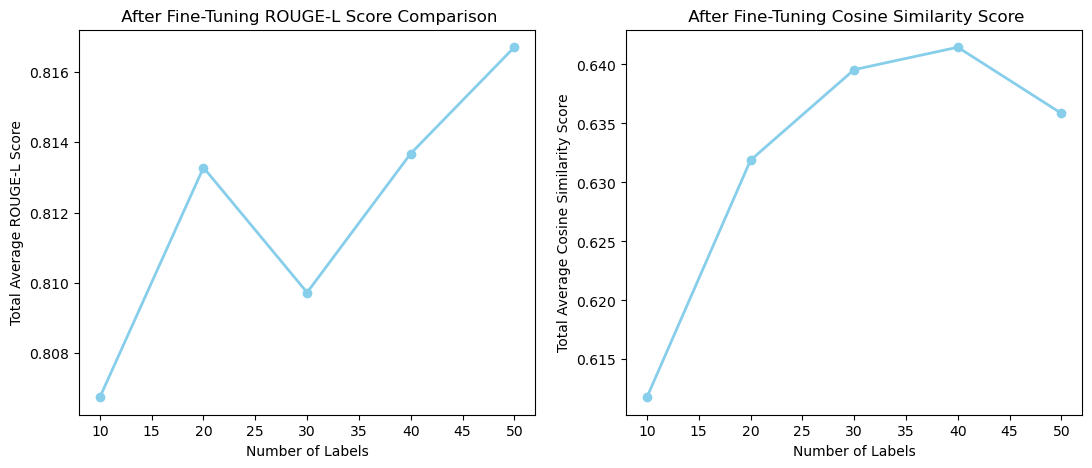

In [122]:
plt.figure(figsize=(20, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('Total Average ROUGE-L Score')
plt.title(' After Fine-Tuning ROUGE-L Score Comparison')

plt.subplot(1, 3, 2)
plt.plot(num_labels, total_average_cosine_similarity_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel('Number of Labels')
plt.ylabel('Total Average Cosine Similarity Score')
plt.title(' After Fine-Tuning Cosine Similarity Score')
